In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data

In [7]:
train_path = 'acnedataset/train'
test_path = 'acnedataset/test'
val_path = 'acnedataset/valid'

Xem qua tổng số ảnh và lớp

In [8]:
train_images = os.listdir(train_path+'/images')
test_images = os.listdir(test_path+'/images')
val_images = os.listdir(val_path+'/images')
train_labels = os.listdir(train_path+'/labels')
test_labels = os.listdir(test_path+'/labels')
val_labels = os.listdir(val_path+'/labels')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_val_images = len(val_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)
num_val_labels = len(val_labels)

print('images train: ',num_train_images,', images test: ', num_test_images,', images val: ', num_val_images, )
print('labels train: ',num_train_labels,', labels test: ', num_test_labels,', labels val: ', num_val_labels, )

images train:  1167 , images test:  97 , images val:  193
labels train:  1167 , labels test:  97 , labels val:  193


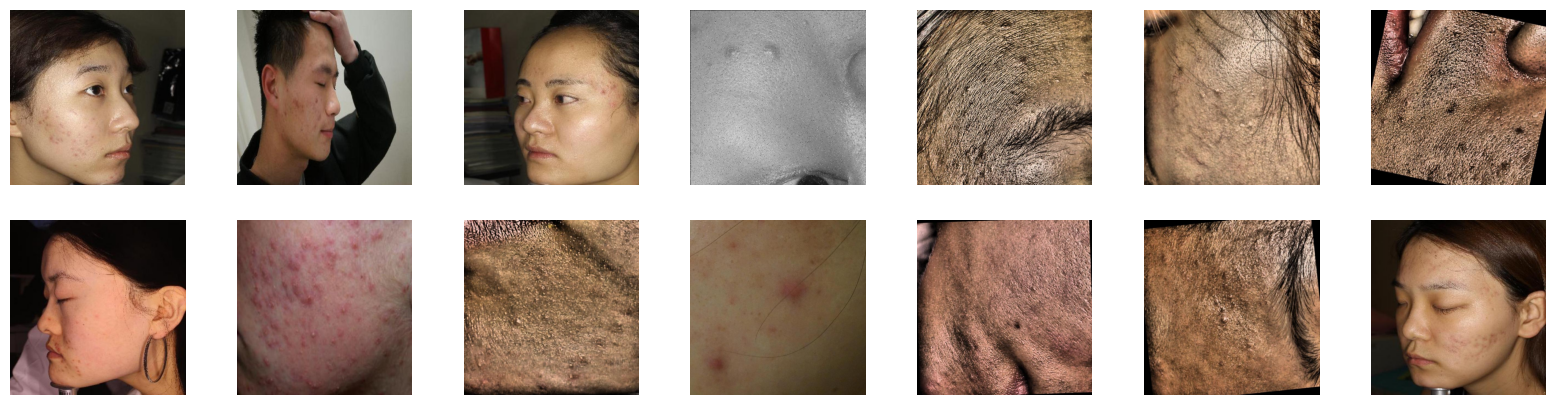

In [11]:
plt.figure(figsize=(20,5))
for i, c in enumerate(np.random.randint(0, len(train_images), size=14), start=1):
    plt.subplot(2,7,i)
    im = plt.imread(train_path+'/images/'+train_images[c])
    plt.axis('off')
    plt.imshow(im, cmap='gray')

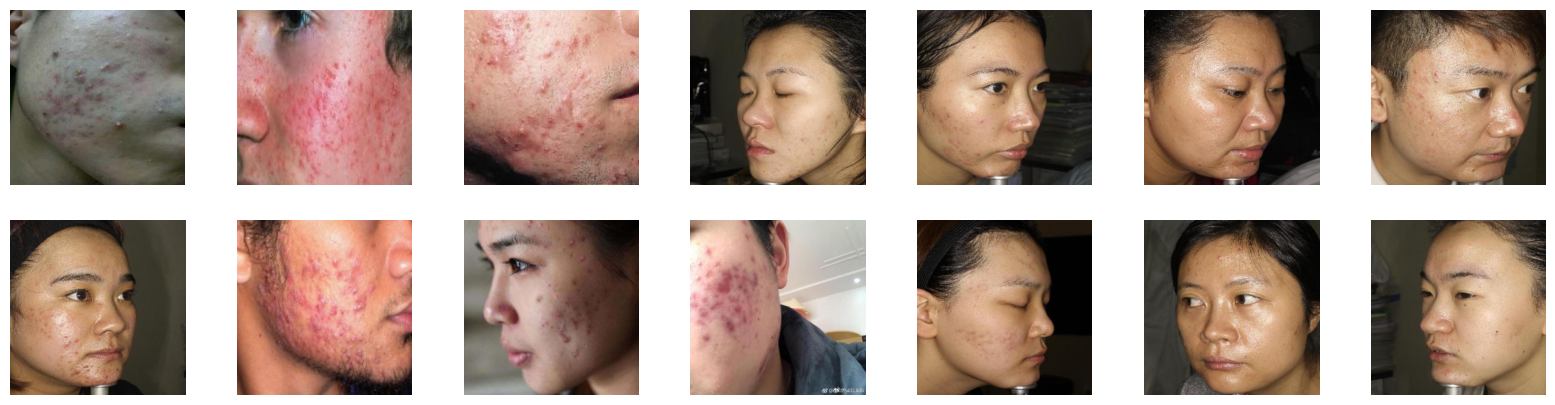

In [12]:
plt.figure(figsize=(20,5))
for i, c in enumerate(np.random.randint(0, len(test_images), size=14), start=1):
    plt.subplot(2,7,i)
    im = plt.imread(test_path+'/images/'+test_images[c])
    plt.axis('off')
    plt.imshow(im, cmap='gray')

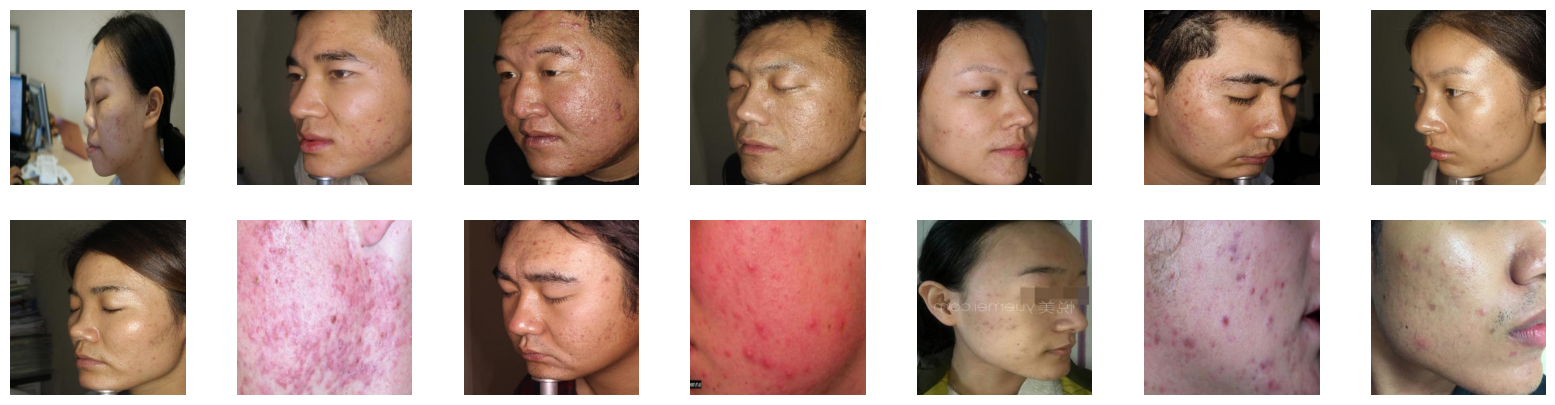

In [13]:
plt.figure(figsize=(20,5))
for i, c in enumerate(np.random.randint(0, len(val_images), size=14), start=1):
    plt.subplot(2,7,i)
    im = plt.imread(val_path+'/images/'+val_images[c])
    plt.axis('off')
    plt.imshow(im, cmap='gray')

YOLO V8 Model

In [14]:
from ultralytics import YOLO

Training 

In [4]:
# Load a model
model = YOLO("yolo11n.yaml")  # build a new model from YAML
model = YOLO("yolo11n.pt")  # load a pretrained model
model = YOLO("yolo11n.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
train_results = model.train(
    data='acnedataset/data.yaml',  # path to dataset YAML
    model=model,
    epochs=60,  # number of training epochs
    imgsz=640,  # training image size
    name='Model',
    patience=10,
    batch=8,
)

100%|█████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:01<00:00, 3.56MB/s]


Transferred 499/499 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.29 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.27  Python-3.8.10 torch-2.4.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: task=detect, mode=train, model=YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, 

train: Scanning D:\AcneProject\acnedataset\train\labels... 672 images, 0 backgrounds, 0 corrupt: 100%|██████████| 672/6

train: New cache created: D:\AcneProject\acnedataset\train\labels.cache



val: Scanning D:\AcneProject\acnedataset\valid\labels... 193 images, 0 backgrounds, 0 corrupt: 100%|██████████| 193/193

val: New cache created: D:\AcneProject\acnedataset\valid\labels.cache


Plotting labels to runs\detect\Model\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\Model
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60         0G       2.89       4.39      1.585         50        640: 100%|██████████| 84/84 [03:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:27

                   all        193       1407    0.00921      0.357     0.0348       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60         0G        2.6      3.537      1.404        107        640: 100%|██████████| 84/84 [03:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:37

                   all        193       1407      0.222       0.15      0.055     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60         0G      2.553      3.158      1.387         80        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  46%|████▌     | 6/13 [00:25<

WARNING  NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  54%|█████▍    | 7/13 [00:30<

WARNING  NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 8/13 [00:34<

WARNING  NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:52

                   all        193       1407      0.075       0.12     0.0597     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60         0G      2.548      3.101      1.404         49        640: 100%|██████████| 84/84 [03:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:26

                   all        193       1407      0.295      0.155     0.0718     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60         0G      2.484      3.039       1.38        113        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25

                   all        193       1407      0.161      0.175     0.0895     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60         0G      2.486      2.924      1.407         46        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:28


                   all        193       1407      0.197      0.188     0.0916     0.0294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60         0G      2.461       2.85      1.361         88        640: 100%|██████████| 84/84 [03:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.362      0.162     0.0958     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60         0G       2.46      2.853      1.361         69        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24


                   all        193       1407      0.207      0.201      0.123     0.0397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60         0G      2.441      2.747      1.367        103        640: 100%|██████████| 84/84 [03:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.352      0.228      0.146     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60         0G      2.399      2.708       1.34         95        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.245      0.217      0.148     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60         0G      2.402      2.662      1.361        134        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.204      0.231      0.145     0.0477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60         0G      2.413      2.648      1.366        210        640: 100%|██████████| 84/84 [03:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.186      0.216      0.147     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60         0G       2.37      2.591       1.32         79        640: 100%|██████████| 84/84 [03:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25


                   all        193       1407      0.227       0.25       0.16     0.0586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60         0G      2.378       2.54      1.313         69        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407       0.25      0.248      0.158     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60         0G      2.375      2.603      1.352         90        640: 100%|██████████| 84/84 [03:30<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25


                   all        193       1407      0.249      0.225      0.151     0.0523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60         0G      2.354      2.536       1.32         43        640: 100%|██████████| 84/84 [03:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.227      0.245      0.173     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60         0G      2.356      2.524      1.323         48        640: 100%|██████████| 84/84 [03:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25


                   all        193       1407      0.208      0.251      0.164     0.0601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60         0G      2.333       2.53      1.334         78        640: 100%|██████████| 84/84 [03:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.229       0.24      0.171     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60         0G      2.319      2.492      1.313        106        640: 100%|██████████| 84/84 [03:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407        0.3      0.234      0.198     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60         0G      2.295      2.397      1.308         90        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25

                   all        193       1407      0.252      0.269      0.177     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60         0G      2.304      2.349      1.314         75        640: 100%|██████████| 84/84 [03:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.234      0.288        0.2     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60         0G       2.31      2.389      1.304         70        640: 100%|██████████| 84/84 [03:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:28

                   all        193       1407      0.215      0.247      0.181     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60         0G      2.294       2.41      1.311         41        640: 100%|██████████| 84/84 [03:48<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25

                   all        193       1407      0.225      0.273      0.162     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60         0G      2.331      2.388      1.288         61        640: 100%|██████████| 84/84 [03:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.251      0.297      0.184     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60         0G      2.306        2.4      1.306         94        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23


                   all        193       1407      0.262        0.3      0.195     0.0681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60         0G      2.298      2.318       1.34         76        640: 100%|██████████| 84/84 [03:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23


                   all        193       1407      0.226      0.281      0.198     0.0652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60         0G      2.296      2.308      1.315         67        640: 100%|██████████| 84/84 [03:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.276      0.252      0.197      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60         0G      2.288      2.311      1.313         77        640: 100%|██████████| 84/84 [03:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.266      0.267      0.202     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60         0G      2.306      2.285      1.294         87        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.262      0.287      0.204     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60         0G      2.263      2.226      1.307        130        640: 100%|██████████| 84/84 [03:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25

                   all        193       1407      0.248      0.245      0.196     0.0676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60         0G      2.244       2.22      1.298        100        640: 100%|██████████| 84/84 [03:44<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24


                   all        193       1407      0.258      0.283       0.21      0.073

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60         0G      2.247      2.246      1.286         44        640: 100%|██████████| 84/84 [03:42<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24


                   all        193       1407      0.283      0.285      0.212     0.0742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60         0G      2.249      2.205       1.28        122        640: 100%|██████████| 84/84 [03:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:26

                   all        193       1407      0.316      0.294      0.237     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60         0G      2.222      2.206      1.285         73        640: 100%|██████████| 84/84 [03:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.316      0.268       0.23       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60         0G      2.226      2.181      1.265        139        640: 100%|██████████| 84/84 [03:45<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25


                   all        193       1407      0.329      0.271      0.236     0.0808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60         0G      2.255      2.188      1.277        100        640: 100%|██████████| 84/84 [03:50<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.261       0.27      0.219     0.0771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60         0G      2.207      2.139      1.268         95        640: 100%|██████████| 84/84 [03:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.293      0.308      0.224     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60         0G      2.248      2.168      1.286        111        640: 100%|██████████| 84/84 [03:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.274      0.285      0.229     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60         0G      2.202      2.162      1.267         82        640: 100%|██████████| 84/84 [03:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.263      0.346      0.244     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60         0G      2.208      2.133      1.272         44        640: 100%|██████████| 84/84 [03:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.301      0.285      0.221     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60         0G      2.206      2.071      1.284         84        640: 100%|██████████| 84/84 [03:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:26


                   all        193       1407      0.288      0.297      0.238     0.0842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60         0G      2.169      2.069      1.273         61        640: 100%|██████████| 84/84 [03:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.368      0.285      0.253     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60         0G      2.174      2.068      1.299         82        640: 100%|██████████| 84/84 [03:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.365      0.315       0.27     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60         0G      2.169      2.072      1.253         48        640: 100%|██████████| 84/84 [03:30<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.343      0.311      0.274     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60         0G      2.175      2.027       1.25         99        640: 100%|██████████| 84/84 [03:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:27

                   all        193       1407      0.322      0.314      0.271     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60         0G      2.163      1.997      1.269         54        640: 100%|██████████| 84/84 [04:30<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:28


                   all        193       1407      0.286      0.329      0.263     0.0912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60         0G      2.176      1.986      1.258        122        640: 100%|██████████| 84/84 [03:53<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407       0.29      0.333      0.266     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60         0G      2.176      2.007      1.257         49        640: 100%|██████████| 84/84 [03:57<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:26

                   all        193       1407      0.357      0.279      0.261     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60         0G      2.151      1.966      1.255         80        640: 100%|██████████| 84/84 [03:56<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.397      0.281      0.274     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60         0G      2.153      2.005      1.244         81        640: 100%|██████████| 84/84 [03:57<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:26

                   all        193       1407      0.366      0.292      0.273     0.0958


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60         0G      2.144      1.986      1.292         43        640: 100%|██████████| 84/84 [03:55<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.351      0.301      0.254     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60         0G      2.127      1.967      1.297        110        640: 100%|██████████| 84/84 [03:43<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24


                   all        193       1407      0.381      0.329      0.285     0.0987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60         0G      2.097      1.913      1.281         56        640: 100%|██████████| 84/84 [03:52<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:30

                   all        193       1407      0.365      0.326      0.276     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60         0G      2.102      1.882      1.285         45        640: 100%|██████████| 84/84 [04:08<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.341      0.338      0.281     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60         0G      2.093      1.869      1.263         80        640: 100%|██████████| 84/84 [03:54<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.355      0.356      0.288      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60         0G        2.1      1.851      1.274         55        640: 100%|██████████| 84/84 [03:47<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25

                   all        193       1407      0.368      0.324      0.277     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60         0G      2.085      1.848      1.258         83        640: 100%|██████████| 84/84 [03:54<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.329      0.341      0.285      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60         0G      2.074      1.821      1.269         80        640: 100%|██████████| 84/84 [03:57<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.351      0.338      0.289      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60         0G      2.083      1.822      1.276         56        640: 100%|██████████| 84/84 [03:42<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.342      0.348      0.297      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60         0G       2.07      1.796      1.255        106        640: 100%|██████████| 84/84 [03:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.358      0.333      0.296      0.103



60 epochs completed in 4.116 hours.
Optimizer stripped from runs\detect\Model\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\Model\weights\best.pt, 5.5MB

Validating runs\detect\Model\weights\best.pt...
Ultralytics 8.3.27  Python-3.8.10 torch-2.4.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:18


                   all        193       1407      0.343       0.35      0.296      0.103
            blackheads         44        111      0.347      0.514      0.423       0.15
             dark spot        102        545      0.368      0.442      0.324      0.121
               nodules         21         54      0.354      0.193      0.211     0.0689
               papules        106        336      0.387      0.509      0.384      0.136
              pustules         62        149      0.332      0.327      0.332      0.116
            whiteheads         50        212      0.267      0.118      0.103     0.0292
Speed: 1.8ms preprocess, 81.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs\detect\Model


In [3]:
# Fine-tuning
model = YOLO("runs/detect/Model/weights/best.pt")

train_results = model.train(
    data='acnedataset/data.yaml',  # path to dataset YAML
    epochs=40,  # number of training epochs
    imgsz=640,  # training image size
    name='Model3',
    patience=8,
    batch=8,
    lr0=0.001
)

New https://pypi.org/project/ultralytics/8.3.36 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.27  Python-3.8.10 torch-2.4.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: task=detect, mode=train, model=runs/detect/Model/weights/best.pt, data=acnedataset/data.yaml, epochs=40, time=None, patience=8, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=Model3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

train: Scanning D:\AcneProject\acnedataset\train\labels... 1167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1167

train: New cache created: D:\AcneProject\acnedataset\train\labels.cache



val: Scanning D:\AcneProject\acnedataset\valid\labels... 193 images, 0 backgrounds, 0 corrupt: 100%|██████████| 193/193

val: New cache created: D:\AcneProject\acnedataset\valid\labels.cache


Plotting labels to runs\detect\Model3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\Model3
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40         0G      2.306      2.404        1.3        128        640: 100%|██████████| 146/146 [06:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24


                   all        193       1407      0.241      0.284      0.189     0.0649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40         0G      2.304      2.407      1.317         47        640: 100%|██████████| 146/146 [06:12<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.241      0.265      0.148     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40         0G      2.304      2.376      1.322         92        640: 100%|██████████| 146/146 [06:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.207      0.284      0.168     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40         0G      2.312      2.358      1.332         21        640: 100%|██████████| 146/146 [06:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407       0.24      0.255      0.166     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40         0G       2.31      2.375      1.339         52        640: 100%|██████████| 146/146 [06:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24


                   all        193       1407       0.26      0.253      0.182     0.0634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40         0G       2.32       2.41      1.346         51        640: 100%|██████████| 146/146 [06:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25

                   all        193       1407      0.182      0.251      0.141     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40         0G      2.279      2.312      1.323         38        640: 100%|██████████| 146/146 [06:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.236      0.242      0.158     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40         0G      2.279      2.306      1.307         44        640: 100%|██████████| 146/146 [06:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.208      0.253      0.172     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40         0G      2.267      2.322      1.345         71        640: 100%|██████████| 146/146 [06:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24


                   all        193       1407      0.253      0.254      0.203     0.0718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40         0G      2.252      2.292      1.317        149        640: 100%|██████████| 146/146 [06:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.223      0.274      0.195     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40         0G      2.259      2.276      1.329         60        640: 100%|██████████| 146/146 [06:12<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.251      0.282      0.208     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40         0G      2.214      2.171      1.328         36        640: 100%|██████████| 146/146 [06:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.286      0.243        0.2     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40         0G      2.246       2.18      1.301         57        640: 100%|██████████| 146/146 [06:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.273      0.273       0.22     0.0782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40         0G      2.238       2.19      1.296         62        640: 100%|██████████| 146/146 [06:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.245      0.241      0.192     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40         0G      2.253      2.191      1.291         45        640: 100%|██████████| 146/146 [06:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.249       0.28      0.216     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40         0G      2.224      2.165      1.293         56        640: 100%|██████████| 146/146 [06:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.269      0.278      0.194     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40         0G       2.21      2.139      1.306         53        640: 100%|██████████| 146/146 [06:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407      0.244      0.253      0.188     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40         0G       2.22       2.12       1.28         53        640: 100%|██████████| 146/146 [06:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23


                   all        193       1407      0.271       0.26      0.215     0.0783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40         0G      2.193       2.09      1.273         88        640: 100%|██████████| 146/146 [06:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.287      0.274       0.23     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40         0G       2.18      2.068      1.269         82        640: 100%|██████████| 146/146 [05:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.254      0.235      0.201      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40         0G      2.177      2.022      1.266         18        640: 100%|██████████| 146/146 [06:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.351      0.283      0.242      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40         0G      2.169      2.033      1.296        110        640: 100%|██████████| 146/146 [05:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.281      0.299      0.231     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40         0G      2.163      2.004      1.275         58        640: 100%|██████████| 146/146 [06:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.224      0.311      0.203     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40         0G      2.167      1.991      1.277         43        640: 100%|██████████| 146/146 [06:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.286      0.316      0.246     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40         0G       2.13      1.989      1.272         66        640: 100%|██████████| 146/146 [06:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.343      0.318      0.265     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40         0G      2.154      1.977      1.247         30        640: 100%|██████████| 146/146 [06:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.299      0.307      0.243     0.0831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40         0G      2.132      1.968      1.259        103        640: 100%|██████████| 146/146 [06:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.303      0.307      0.251     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40         0G      2.121      1.904      1.256         46        640: 100%|██████████| 146/146 [06:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.309      0.304      0.247      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40         0G      2.112      1.896      1.252         39        640: 100%|██████████| 146/146 [06:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24

                   all        193       1407       0.32      0.313      0.265      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40         0G      2.094      1.896       1.26        119        640: 100%|██████████| 146/146 [06:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25


                   all        193       1407      0.303      0.308      0.255      0.092
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40         0G      2.106      1.902      1.285         21        640: 100%|██████████| 146/146 [06:12<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23


                   all        193       1407      0.301      0.332      0.263     0.0951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40         0G      2.086      1.837      1.268         68        640: 100%|██████████| 146/146 [05:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.349      0.304      0.257      0.087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40         0G       2.08      1.812      1.286         60        640: 100%|██████████| 146/146 [05:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.312      0.339      0.265     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40         0G      2.048      1.798      1.269         51        640: 100%|██████████| 146/146 [05:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407       0.36      0.299      0.269     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40         0G      2.041      1.743      1.256         22        640: 100%|██████████| 146/146 [05:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:23

                   all        193       1407      0.348      0.342      0.285      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40         0G      2.037      1.745      1.266         32        640: 100%|██████████| 146/146 [05:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.334      0.332      0.278     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40         0G      2.025      1.723      1.259         27        640: 100%|██████████| 146/146 [05:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.377      0.316       0.28        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40         0G      2.025      1.708      1.256         19        640: 100%|██████████| 146/146 [05:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407       0.37       0.32      0.286      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40         0G      2.015      1.698      1.241         35        640: 100%|██████████| 146/146 [05:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407      0.357      0.326      0.284      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40         0G      2.004      1.668      1.247         30        640: 100%|██████████| 146/146 [05:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22

                   all        193       1407       0.36      0.334      0.292      0.105



40 epochs completed in 4.348 hours.
Optimizer stripped from runs\detect\Model3\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\Model3\weights\best.pt, 5.5MB

Validating runs\detect\Model3\weights\best.pt...
Ultralytics 8.3.27  Python-3.8.10 torch-2.4.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:18


                   all        193       1407      0.359      0.334      0.292      0.105
            blackheads         44        111      0.389      0.459      0.422      0.161
             dark spot        102        545      0.356       0.42      0.338      0.125
               nodules         21         54      0.359      0.204      0.181      0.064
               papules        106        336      0.426      0.507      0.417      0.147
              pustules         62        149      0.334      0.262      0.279      0.101
            whiteheads         50        212      0.292      0.151      0.117     0.0335
Speed: 1.8ms preprocess, 79.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs\detect\Model3


Training Results, Evaluation

In [15]:
# Try predicting model trained
model = YOLO("runs/detect/Model/weights/best.pt")
#input_image = cv2.imread('acnedataset/test/images/-QqvXU26S8A_jpg.rf.993898f2251847a2dd2586c181540481.jpg')
#results = model.predict(source=input_image, conf=0.25)

In [16]:
class_ids = ['blackheads', 'dark spot', 'nodules', 'papules', 'pustules', 'whiteheads']

In [17]:
def Predict(image_path):
    # Load hình ảnh
    image = cv2.imread(image_path)    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image)  # Hàm dự đoán của YOLO
    # Duyệt qua từng kết quả dự đoán
    for r in results:
        # Lấy các bounding box, nhãn và confidence
        boxes = r.boxes  # Lấy bounding box của các đối tượng
        names = boxes.cls  # Lấy nhãn lớp (class) của từng đối tượng
        confs = boxes.conf  # Lấy độ tin cậy (confidence) của từng đối tượng

        # Duyệt qua từng bounding box, nhãn và độ tin cậy
        for i in range(len(boxes)):
            # Tọa độ của bounding box
            x1, y1, x2, y2 = map(int, boxes.xyxy[i])

            # Nhãn của đối tượng
            class_id = int(names[i])  # ID của lớp (cần chuyển thành số nguyên)
            conf = confs[i]  # Độ tin cậy (confidence score)

            # Chuyển đổi `conf` thành tỷ lệ phần trăm
            conf_percent = f"{conf * 100:.2f}%"

            # Tạo nhãn hiển thị
            label = f"{class_ids[class_id]} {conf_percent}"

            # Vẽ bounding box và nhãn lên ảnh
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 2)  # Màu tím
            cv2.putText(image, label, (x1 - 60, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

    return image


0: 640x640 1 blackheads, 99.7ms
Speed: 3.0ms preprocess, 99.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 102.7ms
Speed: 5.0ms preprocess, 102.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 blackheadss, 100.7ms
Speed: 3.0ms preprocess, 100.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pustules, 112.7ms
Speed: 4.0ms preprocess, 112.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 107.7ms
Speed: 4.0ms preprocess, 107.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 114.7ms
Speed: 5.0ms preprocess, 114.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 100.7ms
Speed: 4.0ms preprocess, 100.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 125.7ms
Speed: 4.0ms preprocess, 125.7

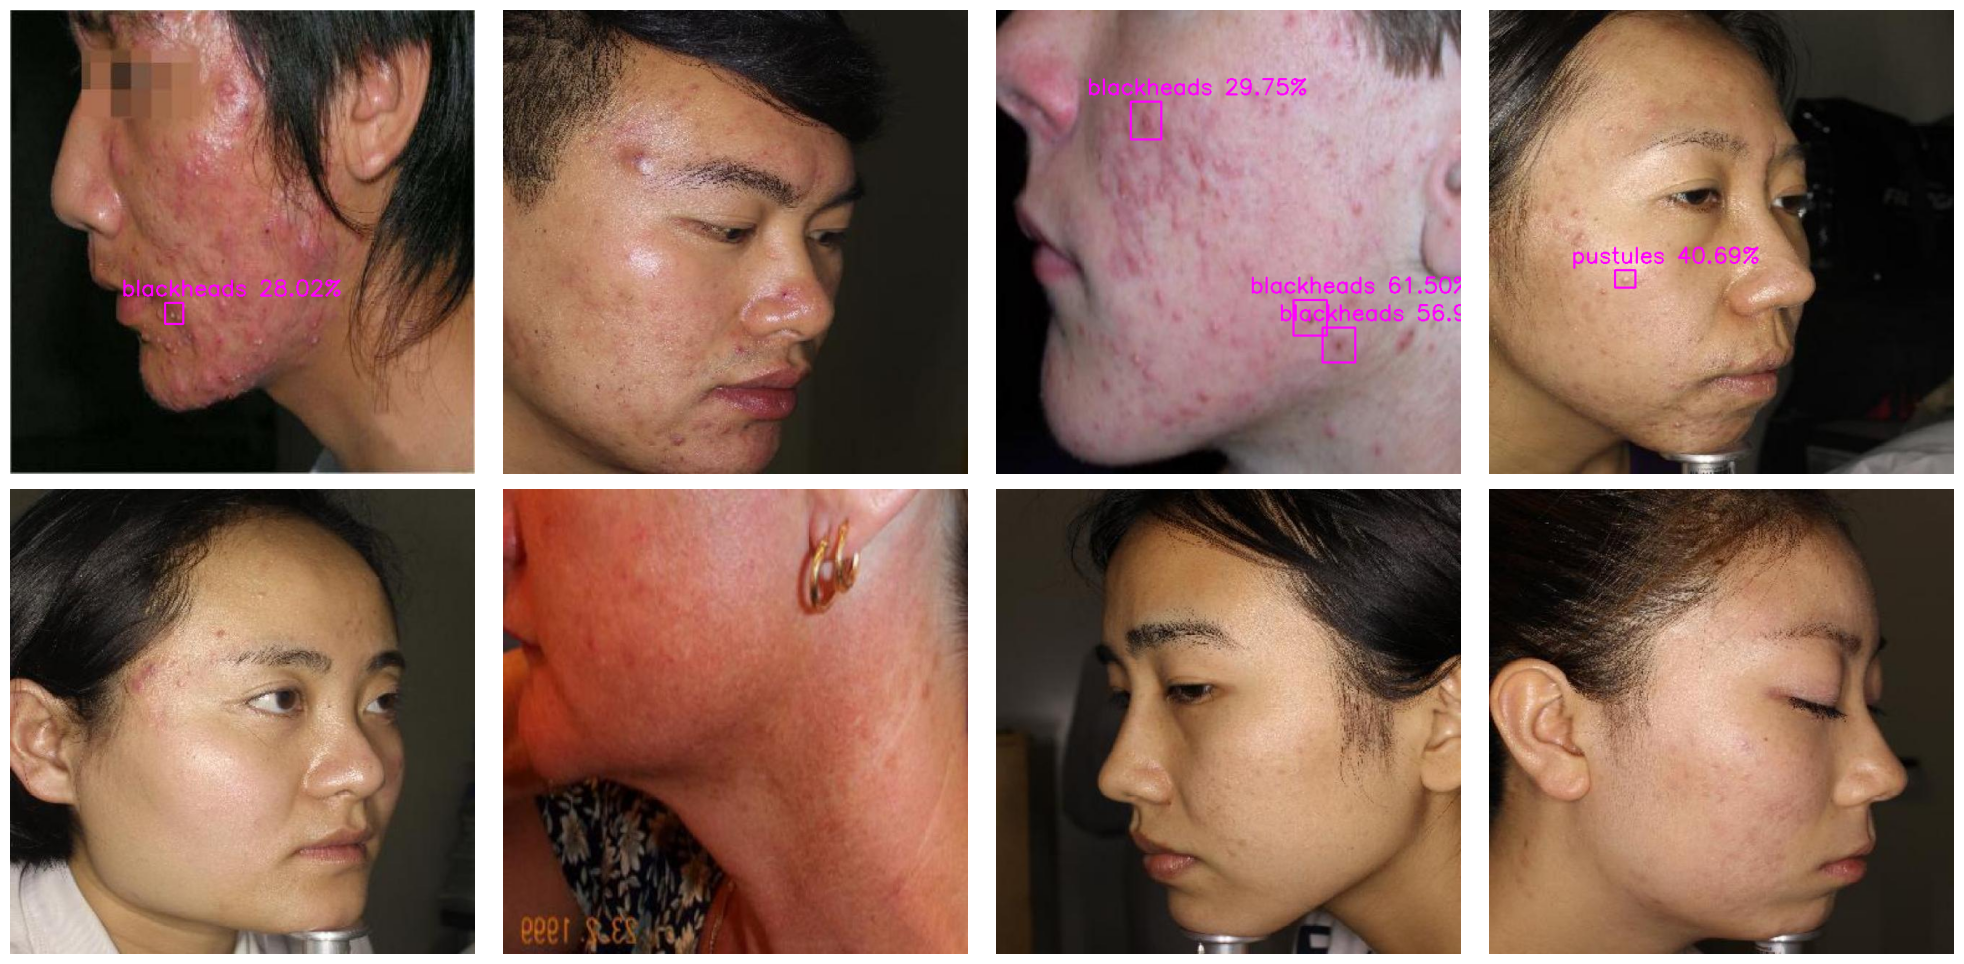

In [24]:
import random

# Định nghĩa đường dẫn thư mục chứa ảnh
custom_image_dir = 'acnedataset/test/images'

# Lấy danh sách các tệp ảnh trong thư mục
image_files = os.listdir(custom_image_dir)

# Chọn ngẫu nhiên 8 ảnh từ danh sách
selected_images = random.sample(image_files, 8)

# Tạo hình với các subplot cho từng ảnh, và điều chỉnh kích thước
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Lặp qua các ảnh đã chọn và vẽ mỗi ảnh lên ô thích hợp
for i, img in enumerate(selected_images):
    # Tính chỉ số hàng và cột cho subplot hiện tại
    row_idx = i // 4
    col_idx = i % 4
    
    # Đường dẫn tới ảnh hiện tại và phát hiện đối tượng trên ảnh
    img_path = os.path.join(custom_image_dir, img)
    detect_img = Predict(img_path)  # Hàm phát hiện đối tượng trên ảnh
    
    # Vẽ ảnh hiện tại lên subplot phù hợp
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')  # Tắt trục để hiển thị ảnh đầy đủ

plt.tight_layout(pad=2)  # Giảm thêm khoảng cách

# Hiển thị hình ảnh
plt.show()

In [25]:
image_pred = Predict("IMG_20241107_194443.jpg")
cv2.imshow("Pred Image", image_pred)  # Hiển thị ảnh gốc để kiểm tra màu sắc
cv2.waitKey(0)  # Nhấn một phím bất kỳ để tiếp tục


0: 640x640 3 blackheadss, 1 dark spot, 107.7ms
Speed: 3.0ms preprocess, 107.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


-1